# 1. load library

In [1]:

import ERgene
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
from scipy import stats

# 2. load data

In [2]:
data=pd.read_csv('shed.csv')
data.set_index(data.columns[0],inplace=True)
data.head(5)

,lab1,lab2,non1,non2
genename,,,,
Pafah1b2,17821.0,6621.523147,4413.130565,5166.555405
Col1a2,11471.0,46160.629140,5384.415414,11526.570670
Pimreg,3619.8,7809.348163,1885.105701,2182.818764
Ece2,4368.0,7241.798139,2039.646059,3104.753018
H1-7,13524.0,7854.745794,8524.998645,4029.384259


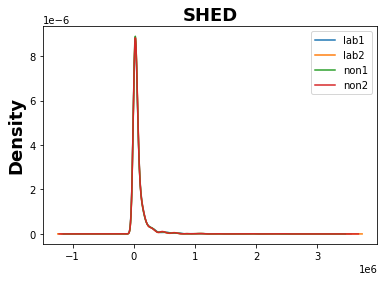

In [3]:
font1 = {
'weight' : 'bold',
'size'   : 18,
}
data.plot(kind = 'density')
plt.title('SHED',font1)
plt.ylabel('Density',font1)

plt.savefig("density.png",dpi=300,bbox_inches = 'tight')

In [4]:
#Mean expression of lab samples for each gene (row)
lab = data.loc[:, 'lab1' : 'lab2'].mean(axis = 1)
lab.head()

genename
Pafah1b2    12221.261573
Col1a2      28815.814570
Pimreg       5714.574081
Ece2         5804.899070
H1-7        10689.372897
dtype: float64

In [5]:
#Mean expression of conctrl samples for each gene (row)
non = data.loc[:,'non1':'non2'].mean(axis = 1)
non.head()

genename
Pafah1b2    4789.842985
Col1a2      8455.493042
Pimreg      2033.962233
Ece2        2572.199539
H1-7        6277.191452
dtype: float64

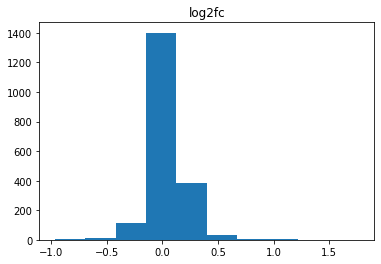

In [11]:
fold = lab/non
log2fold=np.log2(fold)
plt.hist(log2fold)
plt.title("log2fc")
plt.savefig("fold.png",dpi=300,bbox_inches = 'tight')

In [12]:
pvalue = []
for i in range(0, len(data)):
    ttest = stats.ttest_ind(list(data.iloc[i,0:2].values), list(data.iloc[i,2:4].values))
    pvalue.append(ttest[1])
pvalue[0:5]

[0.3165307247277027,
 0.3671578693928609,
 0.22176189611602107,
 0.16937877752625277,
 0.34691903007592884]

In [16]:
genearray = np.asarray(pvalue)
result = pd.DataFrame({'pvalue':genearray,'FoldChange':fold})
result['log(pvalue)'] = -np.log10(result['pvalue'])
result['log2FC'] = np.log2(result['FoldChange'])
result['sig'] = 'normal'
result['size']  =np.abs(result['FoldChange'])/10
result.loc[(result.log2FC> 0.1 )&(result.pvalue < 0.05),'sig'] = 'up'
result.loc[(result.log2FC< -0.1 )&(result.pvalue < 0.05),'sig'] = 'down'
result.to_csv("SAMP8+SHED.csv")
result.head()

,pvalue,FoldChange,log(pvalue),log2FC,sig,size
genename,,,,,,
Pafah1b2,0.316531,2.551495,0.499584,1.351343,normal,0.255150
Col1a2,0.367158,3.407940,0.435147,1.768900,normal,0.340794
Pimreg,0.221762,2.809577,0.654113,1.490353,normal,0.280958
Ece2,0.169379,2.256784,0.771141,1.174268,normal,0.225678
H1-7,0.346919,1.702891,0.459772,0.767986,normal,0.170289


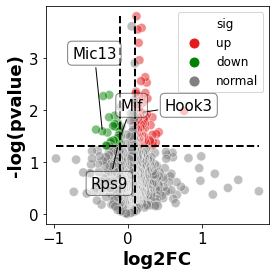

In [18]:
pp=plt.figure(figsize=(4,4))
ax=pp.add_subplot(1,1,1)
ax = sns.scatterplot(x="log2FC", y="log(pvalue)",
                      hue='sig',
                      hue_order = ('up','down','normal'),
                      palette=("#E41A1C","green","grey"),
                      size='sig',sizes=(80,83),
                     alpha=0.5,
                      data=result)
ax.set_ylabel('-log(pvalue)',font1)                                    
ax.set_xlabel('log2FC',font1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='best',fontsize=12)
ax.tick_params(labelsize=15)

#t1=ax.text(result.loc['Hook3']['log2FC'], result.loc['Hook3']['log(pvalue)'], 'Hook3',ha='center', va='bottom', fontdict=font1)
#t2=ax.text(result.loc['Mif']['log2FC'], result.loc['Mif']['log(pvalue)'], 'Mif',ha='center', va='bottom',fontdict=font1)
#t3=ax.text(result.loc['Micos13']['log2FC'], result.loc['Micos13']['log(pvalue)'], 'Mic13',ha='center', va='bottom',fontdict=font1)
#t4=ax.text(result.loc['Rps9']['log2FC'], result.loc['Rps9']['log(pvalue)'], 'Rps9',ha='center', va='bottom',fontdict=font1)
#tests=[t1,t2,t3,t4]
plt.annotate('Hook3', xy=(result.loc['Hook3']['log2FC'], result.loc['Hook3']['log(pvalue)']), xytext=(0.5,2),
bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5),
arrowprops=dict(arrowstyle='-',color='black'),size=15)

plt.annotate('Mif', xy=(result.loc['Mif']['log2FC'], result.loc['Mif']['log(pvalue)']), xytext=(-0.1,2),
bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5),
arrowprops=dict(arrowstyle='-',color='black'),size=15)

plt.annotate('Mic13', xy=(result.loc['Micos13']['log2FC'], result.loc['Micos13']['log(pvalue)']), xytext=(-0.75,3),
bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5),
arrowprops=dict(arrowstyle='-',color='black'),size=15)

plt.annotate('Rps9', xy=(result.loc['Rps9']['log2FC'], result.loc['Rps9']['log(pvalue)']), xytext=(-0.5,0.5),
bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5),
arrowprops=dict(arrowstyle='-',color='black'),size=15)

ax.plot([result['log2FC'].min(),result['log2FC'].max()],[-np.log10(0.05),-np.log10(0.05)],linewidth=2, linestyle="--",color='black')
ax.plot([0.1,0.1],[result['log(pvalue)'].min(),result['log(pvalue)'].max()],linewidth=2, linestyle="--",color='black')
ax.plot([-0.1,-0.1],[result['log(pvalue)'].min(),result['log(pvalue)'].max()],linewidth=2, linestyle="--",color='black')
plt.savefig("fire.png",dpi=300,bbox_inches = 'tight')

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

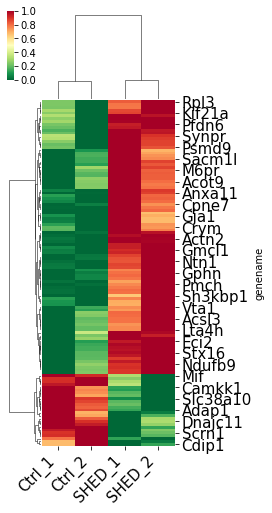

In [25]:
fold_cutoff = 0.1
pvalue_cutoff = 0.05
 
filtered_ids = []
for i in range(0, len(result)):
    if (abs(np.log2(fold[i])) >= fold_cutoff) and (pvalue[i] <= pvalue_cutoff):
        filtered_ids.append(i)        
filtered = data.iloc[filtered_ids,:]
filtered.columns=['SHED_1','SHED_2','Ctrl_1','Ctrl_2']
filtered.to_csv('fi.csv')



a=sns.clustermap(filtered, cmap='RdYlGn_r', standard_scale = 0,figsize=(3,8))
a.ax_heatmap.yaxis.set_tick_params(labelsize=15)
a.ax_heatmap.xaxis.set_tick_params(labelsize=15)

labels=a.ax_heatmap.xaxis.get_ticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.savefig("sns2.png",dpi=300,bbox_inches = 'tight')

## Looking at individual genes
We wanted to look at the expression of individual genes in the sample, so we did the following

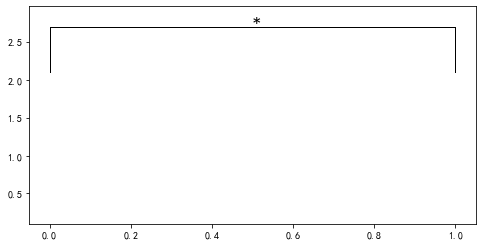

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np                 #使用import导入模块numpy，并简写成np
import matplotlib.pyplot as plt    #使用import导入模块matplotlib.pyplot，并简写成plt
plt.figure(figsize=(8,4))          #设置绘图对象的宽度和高度
from PIL import Image
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题   
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
#x1:起始坐标
#x2：终止坐标
#y1：高度起始
#y2：高度终止
#sig: 标记
#min_x：x坐标轴的最小值，默认为0
def pltx(x1,x2,y1,y2,sig,min_x=0):
    x=np.ones((2))*x1
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x=np.ones((2))*x2
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x = np.arange(x1,x2+0.0001,x2-x1)
    y = y2+0*x
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x0 = (x1+x2)/2
    y0=y2
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(0, +1),
                     textcoords='offset points', fontsize=15,color="black")
    if(min_x!=0):
        plt.ylim(min_x,y2+y2/10)
    
pltx(0,1,2.1,2.7,'*',0.1)

In [28]:
ty=pd.DataFrame(columns=['if','class','value'])
for i in data.index:
    if i[:3]=='Ndu':
        gename=i
        ty=ty.append({'if':gename,'class':'CTRL','value':data.loc[i][2]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'CTRL','value':data.loc[i][3]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'SHED','value':data.loc[i][0]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'SHED','value':data.loc[i][1]},ignore_index=True)
ty.head(12)

,if,class,value
0,Ndufs8,CTRL,8636.147823
1,Ndufs8,CTRL,10239.847290
2,Ndufs8,SHED,16105.000000
3,Ndufs8,SHED,21422.902840
4,Ndufs5,CTRL,17399.472200
5,Ndufs5,CTRL,17285.071030
6,Ndufs5,SHED,19771.000000
7,Ndufs5,SHED,18955.501800
8,Ndufa5,CTRL,16482.133140
9,Ndufa5,CTRL,17340.750740


In [29]:
dyt=[]
for i in ty['if']:
    if (i not in dyt):
        dyt.append(i)

0.07839550409020522  
0.03908983828223432 *
0.1262419203870825  
0.04842545242764284 *
0.34073578711494945  
0.3026102301248539  
0.02977713184478576 *
0.2222798784710601  
0.029053899183749603 *
0.531381368176001  
0.013827715475159829 *
0.8488420790984254  
0.27147774740977637  
0.18600095299367309  
0.36300167875283385  
0.044183193797547635 *
0.4038758245192171  
0.4311181754878195  
0.8680904383709483  
0.2630870849454815  
0.5487217470055084  
0.4511113961853983  
0.8743202831781778  
0.8852233338596682  
0.784501694732991  
0.8781906664070027  
0.516318152365153  
0.8546714333268813  
0.4709285733808717  
0.20249806448294672  
0.17033194113730038  
0.4829980416619717  
0.5441130241117298  
0.3213635203325296  


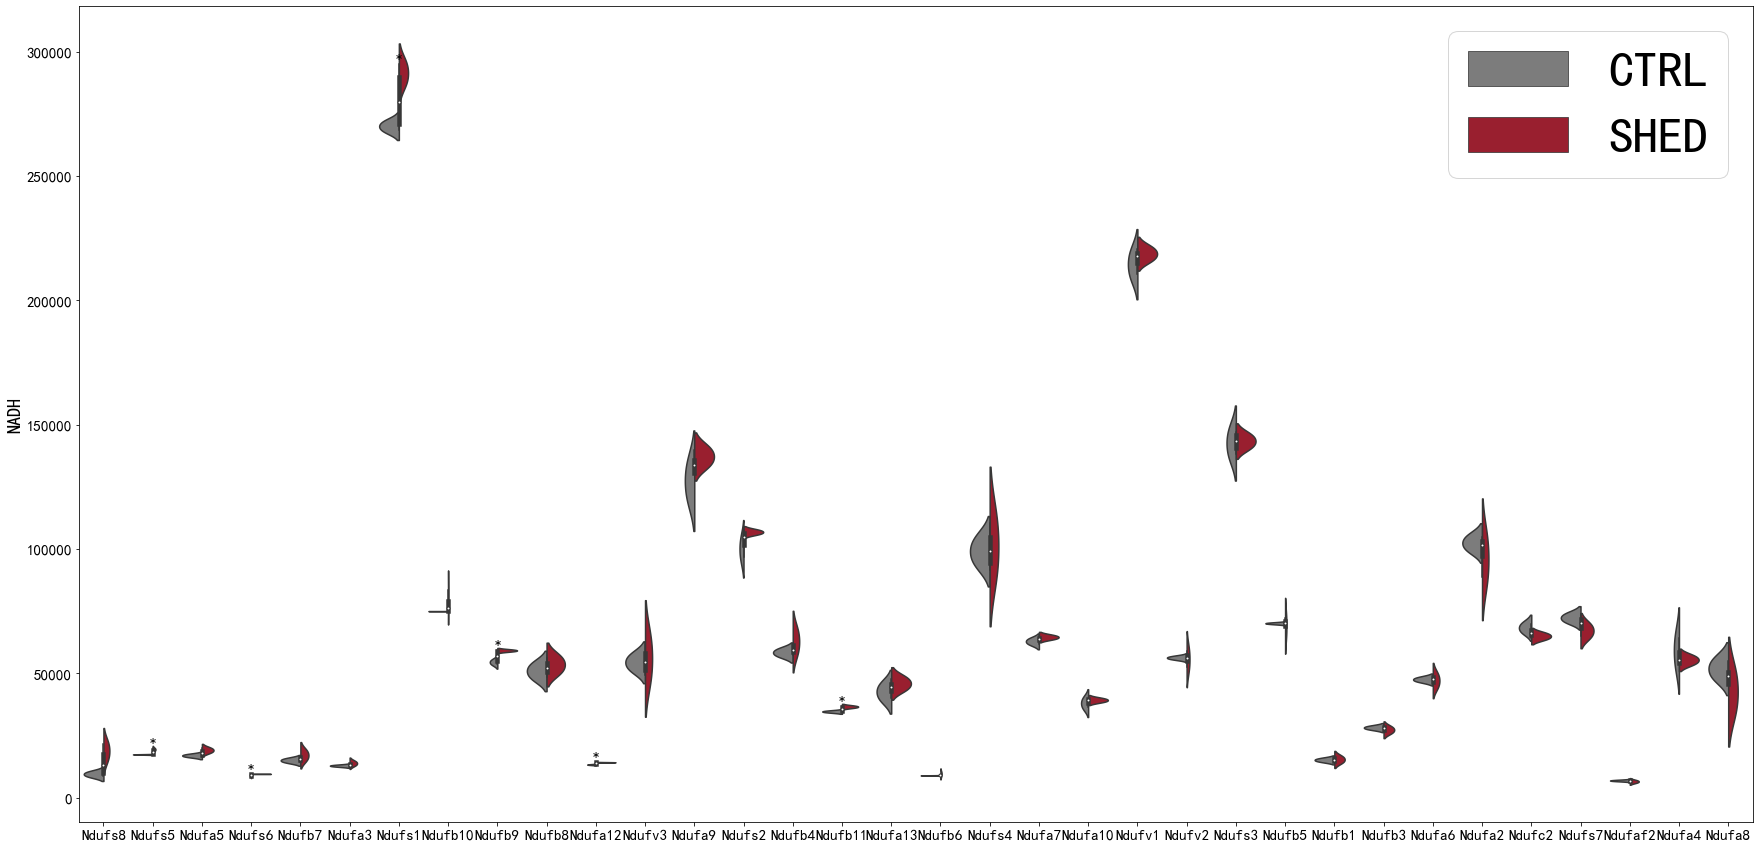

In [30]:
plt.figure(figsize=(30,15))
ax = sns.violinplot(x="if", y="value",hue="class", data=ty,palette=['#7C7C7C','#AD0B20'],
                    scale="area",split=True,
                    )
ax.set_ylabel('NADH',font1)
ax.set_xlabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend(fontsize=50)
for i in range(len(dyt)):
    ttest = stats.ttest_ind(ty[ty['if']==dyt[i]][ty[ty['if']==dyt[i]]['class']=='CTRL']['value'], ty[ty['if']==dyt[i]][ty[ty['if']==dyt[i]]['class']=='SHED']['value'])
    max=ty[ty['if']==dyt[i]]['value'].max()
    if(ttest[1]<0.001):
        xing="***"   
    elif(ttest[1]<0.01):
        xing="**"
    elif(ttest[1]<0.06):
        xing="*"
    else:
        xing=' '
    print(ttest[1],xing)
    ax.text(i,max+0.5, xing,ha='center', va='bottom', fontsize=12)
plt.savefig("ndu.png",dpi=300,bbox_inches = 'tight')

In [33]:
ty=pd.DataFrame(columns=['if','class','value'])
for i in data.index:
    if i[:3]=='Ndu':
        gename=i
        ty=ty.append({'if':gename,'class':'CTRL','value':data.loc[i][2]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'CTRL','value':data.loc[i][3]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'SHED','value':data.loc[i][0]},ignore_index=True)
        ty=ty.append({'if':gename,'class':'SHED','value':data.loc[i][1]},ignore_index=True)
ty.head(12)

,if,class,value
0,Ndufs8,CTRL,8636.147823
1,Ndufs8,CTRL,10239.847290
2,Ndufs8,SHED,16105.000000
3,Ndufs8,SHED,21422.902840
4,Ndufs5,CTRL,17399.472200
5,Ndufs5,CTRL,17285.071030
6,Ndufs5,SHED,19771.000000
7,Ndufs5,SHED,18955.501800
8,Ndufa5,CTRL,16482.133140
9,Ndufa5,CTRL,17340.750740


In [39]:

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
data1=data.loc[dyt]
data1.apply(normalization,axis=1)

,lab1,lab2,non1,non2
genename,,,,
Ndufs8,0.584108,1.000000,0.000000,0.125419
Ndufs5,1.000000,0.671954,0.046019,0.000000
Ndufa5,0.559202,1.000000,0.000000,0.259554
Ndufs6,1.000000,0.981122,0.000000,0.368014
Ndufb7,0.272530,1.000000,0.000000,0.297828
Ndufa3,1.000000,0.298039,0.265343,0.000000
Ndufs1,1.000000,0.740959,0.121100,0.000000
Ndufb10,1.000000,0.273950,0.003586,0.000000
Ndufb9,0.898114,1.000000,0.000000,0.265628


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

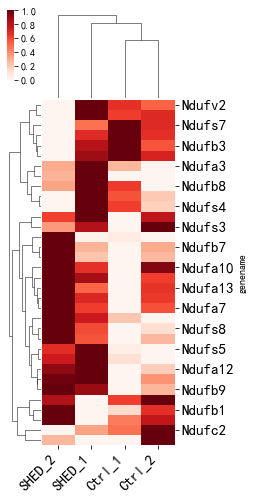

In [42]:
data1.columns=['SHED_1','SHED_2','Ctrl_1','Ctrl_2']
a=sns.clustermap(data1.apply(normalization,axis=1), cmap='Reds', figsize=(3,8),)
a.ax_heatmap.yaxis.set_tick_params(labelsize=15)
a.ax_heatmap.xaxis.set_tick_params(labelsize=15)

labels=a.ax_heatmap.xaxis.get_ticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.savefig("ndu1.png",dpi=300,bbox_inches = 'tight')

In [43]:
p=[]
for i in a.ax_heatmap.yaxis.get_ticklabels():
    p.append(str(i)[14:-2].replace("'",''))
p

['Ndufv2',
 'Ndufs7',
 'Ndufb3',
 'Ndufa3',
 'Ndufb8',
 'Ndufs4',
 'Ndufs3',
 'Ndufb7',
 'Ndufa10',
 'Ndufa13',
 'Ndufa7',
 'Ndufs8',
 'Ndufs5',
 'Ndufa12',
 'Ndufb9',
 'Ndufb1',
 'Ndufc2']

0.516318152365153  
0.3026102301248539  
0.531381368176001  
0.8680904383709483  
0.8852233338596682  


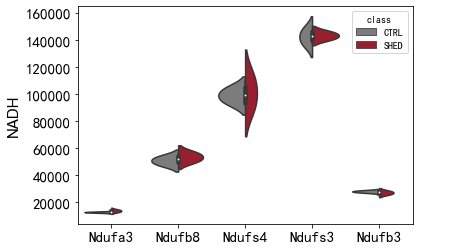

In [44]:
font1 = {
'family': 'Arial',
'size'   : 15,
}
plt.figure(figsize=(6,4))
data2=ty.loc[ty['if'].isin( p[2:7] )]
ax = sns.violinplot(x="if", y="value",hue="class", data=data2,palette=['#7C7C7C','#AD0B20'],
                    scale="area",split=True,
                    )
ax.set_ylabel('NADH',font1)
ax.set_xlabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#ax.legend(fontsize=15)
c=1
for i in p[2:7]:
    ttest = stats.ttest_ind(data2.loc[data2['if'].isin([i]) & data2['class'].isin(['CTRL'])]['value'], data2.loc[data2['if'].isin([i]) & data2['class'].isin(['SHED'])]['value'])
    max=data2[data2['if'].isin([i])]['value'].max()
    if(ttest[1]<0.001):
        xing="***"   
    elif(ttest[1]<0.01):
        xing="**"
    elif(ttest[1]<0.06):
        xing="*"
    else:
        xing=' '
    print(ttest[1],xing)
    ax.text(c,max+0.5, xing,ha='center', va='bottom', fontsize=12)
    c+=1
#plt.savefig("ndu.png",dpi=300,bbox_inches = 'tight')

0.48893414277477043 


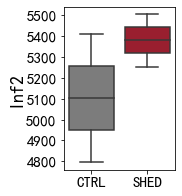

In [46]:
#
gene='Inf2'
ty=pd.DataFrame(columns=['class','value'])
tt=data.loc[gene]

ty=ty.append({'class':'CON','value':tt[2]},ignore_index=True)
ty=ty.append({'class':'CON','value':tt[3]},ignore_index=True)
ty=ty.append({'class':'SHED','value':tt[0]},ignore_index=True)
ty=ty.append({'class':'SHED','value':tt[1]},ignore_index=True)
font1 = {
'weight' : 'bold',
'size'   : 18,
}
p=[]
for i in ty['class']:
    if i=='CON':
        i='CTRL'
    p.append(i)
ty['class']=p
plt.figure(figsize=(2,3))
ax = sns.boxplot(x="class", y="value", data=ty,palette=['#7C7C7C','#AD0B20'],
                    
                    order=["CTRL", "SHED"])
ax.set_ylabel(gene,font1)
ax.set_xlabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ttest = stats.ttest_ind(ty[ty['class']=='SHED']['value'],ty[ty['class']=='CTRL']['value'])
max1=ty['value'].max()
if(ttest[1]<0.001):
    xing="***"   
elif(ttest[1]<0.01):
    xing="**"
elif(ttest[1]<0.07):
    xing="*"
else:
    xing=''
print(ttest[1],xing)

if(xing!=''):
    pltx(0,1,4100,4150,xing)
plt.savefig(""+gene+".png",dpi=300,bbox_inches = 'tight')